In [23]:
%pip install matplotlib
%pip install seaborn
%pip install scipy
%pip install statsmodels
%pip install folium
%pip install jenkspy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("all_data_long_pivotat.csv")
df.head()

,index,country_name,year,access_electricity,co2_emissions_emissions,coal_generation,control_corruption,electricity_capacity,electricity_consumption,electricity_distribution_losses,...,primary_energy_production,regulatory_quality,renewables_capacity,renewables_generation,rule_of_law,solar_capacity,solar_generation,urban_population,wind_capacity,wind_generation
0,0,Algeria,2000,98.6,NaN,NaN,-0.987298,NaN,NaN,NaN,...,NaN,-0.710209,NaN,NaN,-1.245844,NaN,NaN,59.919,NaN,NaN
1,1,Algeria,2002,98.6,72.178921,0.0,-0.928755,6.835,23.279,4.346,...,2.227772e+06,-0.574952,0.280,50.415252,-0.636733,0.000,0.0,61.501,0.0,0.0
2,2,Algeria,2003,98.6,72.478917,0.0,-0.715244,6.845,25.370,4.209,...,2.388694e+06,-0.481901,0.280,235.871355,-0.605381,0.000,0.0,62.284,0.0,0.0
3,3,Algeria,2004,98.6,71.878509,0.0,-0.699273,7.251,26.285,4.976,...,2.434465e+06,-0.441778,0.280,223.267543,-0.616287,0.000,0.0,63.061,0.0,0.0
4,4,Algeria,2005,98.6,82.857279,0.0,-0.466420,7.499,29.518,4.475,...,2.609246e+06,-0.341527,0.282,494.249520,-0.773645,0.002,0.0,63.830,0.0,0.0


In [3]:
# Verificăm acoperirea datelor (important pentru comparații cross-country).
df['year'].value_counts().sort_index()

year
2000    54
2002    58
2003    58
2004    58
2005    58
2006    58
2007    58
2008    58
2009    58
2010    58
2011    58
2012    58
2013    58
2014    58
2015    58
2016    58
2017    58
2018    58
2019    58
2020    58
2021    58
2022    58
2023    58
Name: count, dtype: int64

In [4]:
df = df[df['year'] != 2000].copy()

In [5]:
df

,index,country_name,year,access_electricity,co2_emissions_emissions,coal_generation,control_corruption,electricity_capacity,electricity_consumption,electricity_distribution_losses,...,primary_energy_production,regulatory_quality,renewables_capacity,renewables_generation,rule_of_law,solar_capacity,solar_generation,urban_population,wind_capacity,wind_generation
1,1,Algeria,2002,98.6,72.178921,0.0000,-0.928755,6.835000,23.279000,4.346000,...,2.227772e+06,-0.574952,0.280000,50.415252,-0.636733,0.0000,0.000000,61.501,0.0,0.0
2,2,Algeria,2003,98.6,72.478917,0.0000,-0.715244,6.845000,25.370000,4.209000,...,2.388694e+06,-0.481901,0.280000,235.871355,-0.605381,0.0000,0.000000,62.284,0.0,0.0
3,3,Algeria,2004,98.6,71.878509,0.0000,-0.699273,7.251000,26.285000,4.976000,...,2.434465e+06,-0.441778,0.280000,223.267543,-0.616287,0.0000,0.000000,63.061,0.0,0.0
4,4,Algeria,2005,98.6,82.857279,0.0000,-0.466420,7.499000,29.518000,4.475000,...,2.609246e+06,-0.341527,0.282000,494.249520,-0.773645,0.0020,0.000000,63.830,0.0,0.0
5,5,Algeria,2006,98.7,86.028785,0.0000,-0.564963,7.899000,29.011000,6.295000,...,2.573244e+06,-0.500463,0.282000,194.458827,-0.775205,0.0020,0.000000,64.593,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,1325,Zimbabwe,2019,46.7,9.511752,4.0460,-1.290334,2.457900,8.023400,1.552400,...,2.879544e+04,-1.486515,1.192900,3935.900683,-1.311041,0.0118,15.304630,32.210,0.0,0.0
1326,1326,Zimbabwe,2020,52.7,7.687652,2.7445,-1.308788,2.460200,7.248800,1.445000,...,2.839360e+04,-1.434415,1.195200,3536.359815,-1.337362,0.0141,21.606536,32.242,0.0,0.0
1327,1327,Zimbabwe,2021,49.0,8.108755,2.5080,-1.277147,2.479055,8.554000,1.754000,...,3.624397e+04,-1.386109,1.214055,5452.049347,-1.282122,0.0330,16.204902,32.303,0.0,0.0
1328,1328,Zimbabwe,2022,50.1,14.380704,2.9220,-1.259969,2.492055,8.897000,1.957000,...,3.942377e+04,-1.425967,1.227055,5422.340359,-1.237028,0.0460,26.107898,32.395,0.0,0.0


In [6]:
final_columns = [
    "country_name", 
    "year",         

    # --- PILON 1: Variabile dependente ---
    "renewables_capacity",
    "electricity_distribution_losses",
    "access_electricity",

    # --- PILON 2: Guvernanta ---
    "control_corruption",
    "regulatory_quality",
    "rule_of_law",
    "gov_effectiveness",

    # --- PILON 3: Sistem Energetic ---
    "electricity_capacity",
    "electricity_generation",
    "renewables_generation",
    "coal_generation",
    "primary_energy_production",

      # --- PILON 4: Demografie si Economie ---
    "urban_population",
    "population",
    "gdp_per_capita",

      # --- PILON 5: Mediu ---
    "co2_emissions_emissions"
]

In [7]:
# crearea unui nou DataFrame cu doar coloanele selectate
df_final = df[final_columns].copy()
df_final.head()

,country_name,year,renewables_capacity,electricity_distribution_losses,access_electricity,control_corruption,regulatory_quality,rule_of_law,gov_effectiveness,electricity_capacity,electricity_generation,renewables_generation,coal_generation,primary_energy_production,urban_population,population,gdp_per_capita,co2_emissions_emissions
1,Algeria,2002,0.280,4.346,98.6,-0.928755,-0.574952,-0.636733,-0.614207,6.835,27.647,50.415252,0.0,2.227772e+06,61.501,31750.84,3754.660815,72.178921
2,Algeria,2003,0.280,4.209,98.6,-0.715244,-0.481901,-0.605381,-0.674277,6.845,29.568,235.871355,0.0,2.388694e+06,62.284,32175.82,3945.898161,72.478917
3,Algeria,2004,0.280,4.976,98.6,-0.699273,-0.441778,-0.616287,-0.559223,7.251,31.247,223.267543,0.0,2.434465e+06,63.061,32628.29,4066.282048,71.878509
4,Algeria,2005,0.282,4.475,98.6,-0.466420,-0.341527,-0.773645,-0.446233,7.499,33.909,494.249520,0.0,2.609246e+06,63.830,33109.25,4223.602521,82.857279
5,Algeria,2006,0.282,6.295,98.7,-0.564963,-0.500463,-0.775205,-0.438162,7.899,35.224,194.458827,0.0,2.573244e+06,64.593,33623.50,4279.615471,86.028785


In [8]:
# definirea listei de coloane care contin variabilele de interes

final_columns = [
    "country_name", 
    "year",         
    "renewables_capacity",
    "electricity_distribution_losses",
    "access_electricity",
    "control_corruption",
    "regulatory_quality",
    "rule_of_law",
    "gov_effectiveness",
    "electricity_capacity",
    "electricity_generation",
    "renewables_generation",
    "coal_generation",
    "primary_energy_production",
    "urban_population",
    "population",
    "gdp_per_capita",
    "co2_emissions_emissions"
]

# numaram valorile non-nule pentru fiecare coloana

available_data_per_variable = (
    df_final[final_columns] 
    .count()                   
    .sort_values(ascending=False)
)

print("Numarul de Observatii Disponibile pentru Fiecare Variabila")
print(available_data_per_variable)

Numarul de Observatii Disponibile pentru Fiecare Variabila
country_name                       1276
year                               1276
urban_population                   1188
control_corruption                 1180
rule_of_law                        1179
gov_effectiveness                  1179
regulatory_quality                 1179
access_electricity                 1178
renewables_capacity                1178
electricity_distribution_losses    1178
electricity_capacity               1178
electricity_generation             1178
coal_generation                    1178
renewables_generation              1178
primary_energy_production          1178
population                         1178
co2_emissions_emissions            1178
gdp_per_capita                     1151
dtype: int64


In [9]:
# Stergem randurile cu date lipsa
print(f"Numar de randuri in df_final inainte de filtrarea NaN: {len(df_final)}")

df_curat = df_final.dropna(subset=final_columns)

print(f"Numar de randuri in df_curat dupa filtrarea NaN: {len(df_curat)}")

Numar de randuri in df_final inainte de filtrarea NaN: 1276
Numar de randuri in df_curat dupa filtrarea NaN: 1054


In [10]:
available_data_per_variable_curat = (
    df_curat.count()
    .sort_values(ascending=False)
)

print("Numarul de Observatii Disponibile in DataFrame-ul Curatat")
print(available_data_per_variable_curat)

Numarul de Observatii Disponibile in DataFrame-ul Curatat
country_name                       1054
year                               1054
renewables_capacity                1054
electricity_distribution_losses    1054
access_electricity                 1054
control_corruption                 1054
regulatory_quality                 1054
rule_of_law                        1054
gov_effectiveness                  1054
electricity_capacity               1054
electricity_generation             1054
renewables_generation              1054
coal_generation                    1054
primary_energy_production          1054
urban_population                   1054
population                         1054
gdp_per_capita                     1054
co2_emissions_emissions            1054
dtype: int64


In [11]:
url = "https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv"
regions = pd.read_csv(url)
regions = regions.rename(columns={
    "name": "country",
    "region": "region_geographic",
    "sub-region": "subregion_geographic"
})
 
regions = regions[["country", "region_geographic", "subregion_geographic"]]
 
regions.head()
# Informatii despre regiuni geografice de pe GitHub

,country,region_geographic,subregion_geographic
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia


In [12]:
# Redenumirea coloanei de potrivire 

regions_lookup = regions.rename(columns={"country": "country_name"})

# Pastram doar coloanele necesare pentru merge
regions_lookup = regions_lookup[["country_name", "region_geographic", "subregion_geographic"]]


# Merge-ul efectiv

print(f"Numar de randuri in df_curat inainte de merge: {len(df_curat)}")

df_final_cu_regiuni = pd.merge(
    df_curat,
    regions_lookup,
    on="country_name",  
    how="left"         
)

# Verificare Finala
print(f"Numar de randuri dupa merge: {len(df_final_cu_regiuni)}")

potriviri_esuate = df_final_cu_regiuni['region_geographic'].isna().sum()
print(f"Numar de inregistrari care NU s-au potrivit (regiuni lipsa): {potriviri_esuate}")

print("\n--- Primele 5 randuri ale DataFrame-ului cu Regiuni Adaugate ---")
print(df_final_cu_regiuni[['country_name', 'year', 'region_geographic', 'subregion_geographic',]].head())

Numar de randuri in df_curat inainte de merge: 1054
Numar de randuri dupa merge: 1054
Numar de inregistrari care NU s-au potrivit (regiuni lipsa): 66

--- Primele 5 randuri ale DataFrame-ului cu Regiuni Adaugate ---
  country_name  year region_geographic subregion_geographic
0      Algeria  2002            Africa      Northern Africa
1      Algeria  2003            Africa      Northern Africa
2      Algeria  2004            Africa      Northern Africa
3      Algeria  2005            Africa      Northern Africa
4      Algeria  2006            Africa      Northern Africa


In [13]:
# Stergerem randurile unde regiunea geografica sau subregiunea lipsesc

coloane_regiuni = ["region_geographic", "subregion_geographic"]

print(f"Numar de randuri inainte de stergerea regiunilor lipsa: {len(df_final_cu_regiuni)}")

df_complet = df_final_cu_regiuni.dropna(subset=coloane_regiuni).copy()

print(f"Numar de randuri in df_complet dupa stergerea regiunilor lipsa: {len(df_complet)}")

tari_unice_ramase = df_complet['country_name'].nunique()
print(f"Numar de tari unice ramase in df_complet: {tari_unice_ramase}")

print("\n--- Primele 5 randuri din DataFrame-ul Final (df_complet) ---")
print(df_complet.head())

Numar de randuri inainte de stergerea regiunilor lipsa: 1054
Numar de randuri in df_complet dupa stergerea regiunilor lipsa: 988
Numar de tari unice ramase in df_complet: 47

--- Primele 5 randuri din DataFrame-ul Final (df_complet) ---
  country_name  year  renewables_capacity  electricity_distribution_losses  \
0      Algeria  2002                0.280                            4.346   
1      Algeria  2003                0.280                            4.209   
2      Algeria  2004                0.280                            4.976   
3      Algeria  2005                0.282                            4.475   
4      Algeria  2006                0.282                            6.295   

   access_electricity  control_corruption  regulatory_quality  rule_of_law  \
0                98.6           -0.928755           -0.574952    -0.636733   
1                98.6           -0.715244           -0.481901    -0.605381   
2                98.6           -0.699273           -0.44177

# EDA Descriptiv

In [94]:
df_complet.describe().T

,count,mean,std,min,25%,50%,75%,max
year,988.0,2012.547571,6.324777,2002.000000,2007.000000,2013.000000,2018.000000,2.023000e+03
renewables_capacity,988.0,0.602603,1.123047,0.000000,0.025175,0.128200,0.749800,1.062269e+01
electricity_distribution_losses,988.0,1.537326,3.643918,0.001400,0.080000,0.224000,1.444250,2.507800e+01
access_electricity,988.0,46.676113,29.635169,1.300000,20.175000,42.900000,68.525000,1.000000e+02
control_corruption,988.0,-0.576222,0.638112,-1.724336,-1.051778,-0.674115,-0.162330,1.698510e+00
regulatory_quality,988.0,-0.657703,0.603791,-2.302320,-1.050055,-0.687691,-0.282188,1.196947e+00
rule_of_law,988.0,-0.636276,0.604863,-1.895393,-1.075217,-0.684098,-0.246522,1.023956e+00
gov_effectiveness,988.0,-0.705184,0.614065,-2.149581,-1.155920,-0.773073,-0.379885,1.150045e+00
electricity_capacity,988.0,2.867988,7.968948,0.006000,0.132000,0.471300,2.074800,6.598869e+01
electricity_generation,988.0,11.822233,37.061163,0.021700,0.343925,1.577000,8.509750,2.605079e+02


In [95]:
print("Skew:")
print(df_complet.skew(numeric_only=True).sort_values())
print("\nKurt:")
df_complet.kurtosis(numeric_only=True).sort_values()

Skew:
year                              -0.009189
regulatory_quality                 0.242291
urban_population                   0.360622
access_electricity                 0.361734
rule_of_law                        0.377860
gov_effectiveness                  0.572920
control_corruption                 0.683442
renewables_generation              2.165837
gdp_per_capita                     2.340032
primary_energy_production          2.860666
population                         3.869675
renewables_capacity                4.182134
electricity_distribution_losses    4.422864
electricity_capacity               5.307968
co2_emissions_emissions            5.576549
electricity_generation             5.611906
coal_generation                    6.471409
dtype: float64

Kurt:


year                               -1.194662
access_electricity                 -1.047623
urban_population                   -0.663005
rule_of_law                        -0.308591
gov_effectiveness                  -0.047066
control_corruption                  0.071480
regulatory_quality                  0.441890
renewables_generation               4.220369
gdp_per_capita                      5.982091
primary_energy_production           6.853518
population                         18.009291
electricity_distribution_losses    21.684768
renewables_capacity                25.908999
electricity_capacity               31.189056
co2_emissions_emissions            31.809998
electricity_generation             32.291732
coal_generation                    40.410395
dtype: float64

### Heatmap Temporal

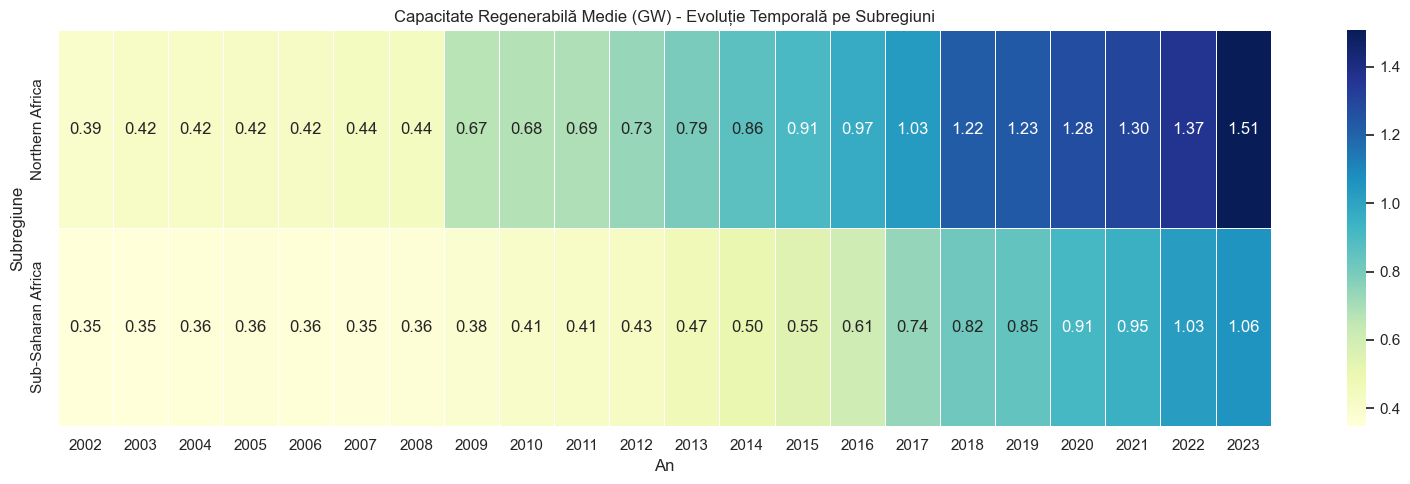

In [96]:
# Evoluția variabilelor în timp 
pivot_data = df_complet.groupby(['year', 'subregion_geographic'])['renewables_capacity'].mean().reset_index()
pivot_table = pivot_data.pivot(index='subregion_geographic', columns='year', values='renewables_capacity')

plt.figure(figsize=(16, 5))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)
plt.title('Capacitate Regenerabilă Medie (GW) - Evoluție Temporală pe Subregiuni')
plt.xlabel('An')
plt.ylabel('Subregiune')
plt.tight_layout()
plt.show()

### Boxplots Comparative - Subregiuni

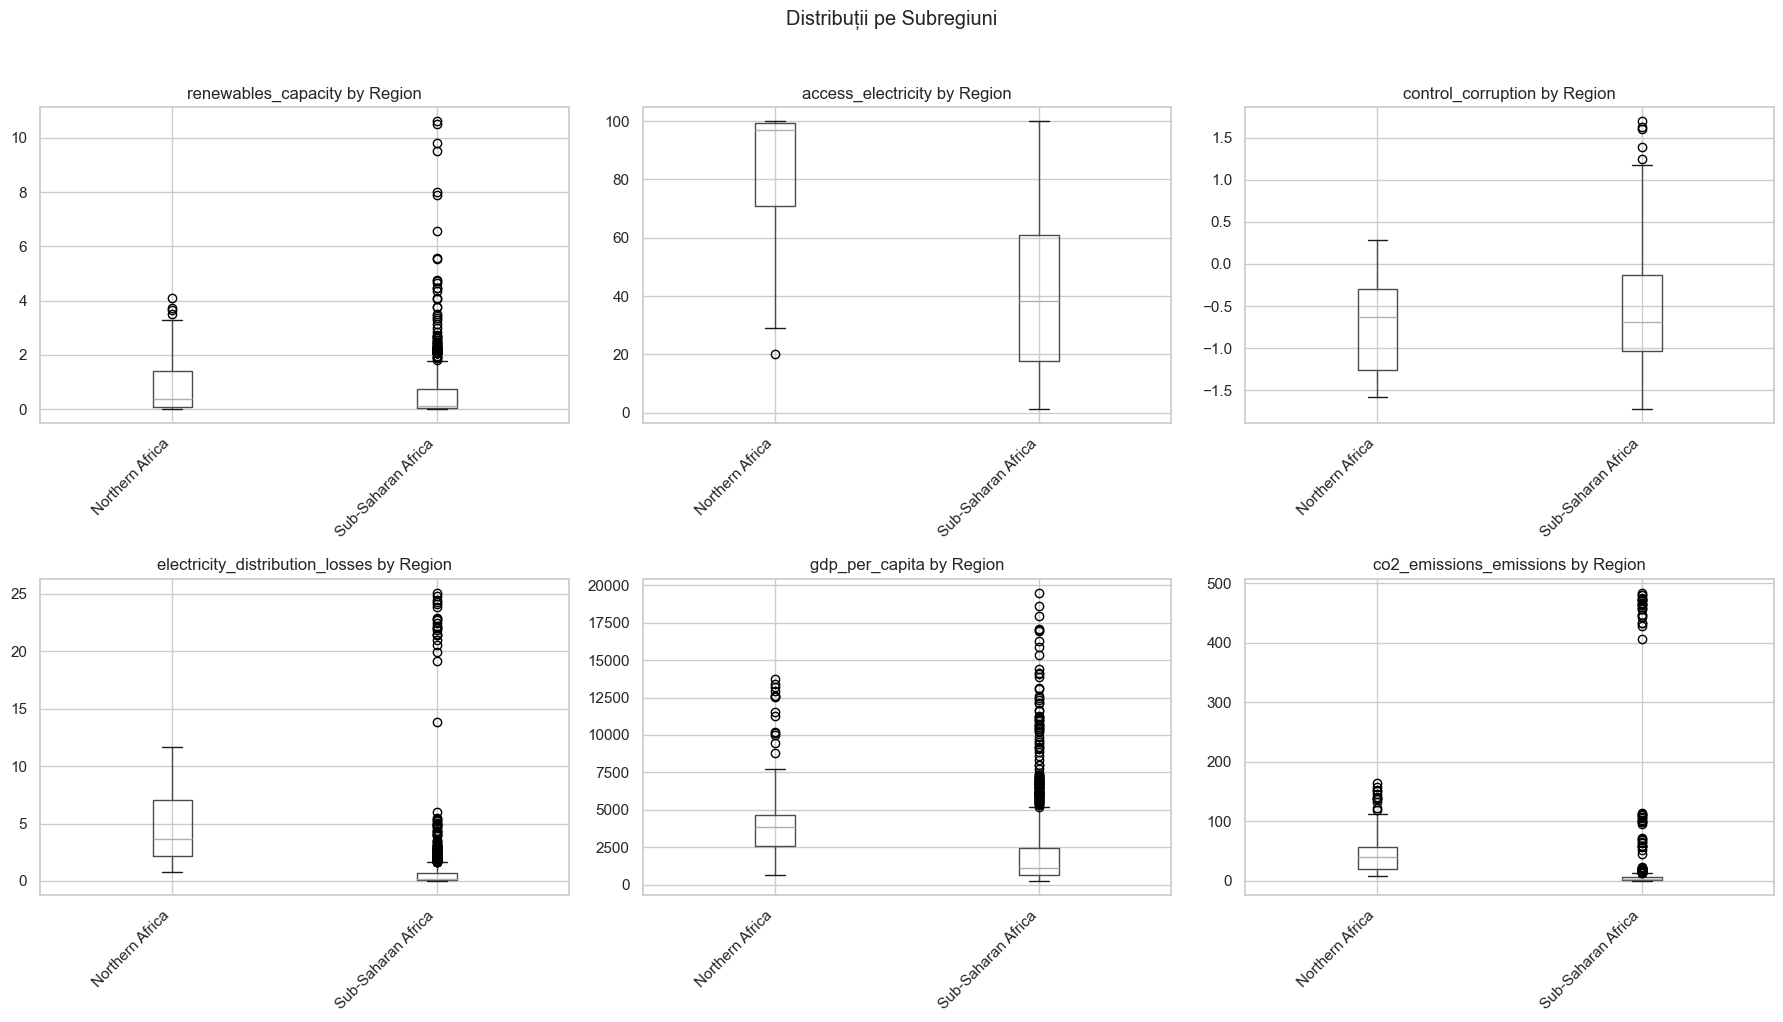

In [97]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

vars_to_plot = ['renewables_capacity', 'access_electricity', 'control_corruption',
                'electricity_distribution_losses', 'gdp_per_capita', 'co2_emissions_emissions']

for i, var in enumerate(vars_to_plot):
    ax = axes.flat[i]
    df_complet.boxplot(column=var, by='subregion_geographic', ax=ax)
    ax.set_title(f'{var} by Region')
    ax.set_xlabel('')
    plt.sca(ax)
    plt.xticks(rotation=45, ha='right')
    
plt.suptitle('Distribuții pe Subregiuni', y=1.02)
plt.tight_layout()
plt.show()

### Trend-lines pe subregiuni

In [98]:
# Agregare pentru grafice de trend (pe an si subregiune)
df_trend = df_complet.groupby(['year', 'subregion_geographic']).agg({
    'renewables_capacity': 'mean',
    'control_corruption': 'mean',
    'access_electricity': 'mean',
    'electricity_generation': 'sum',
    'renewables_generation': 'sum'
}).reset_index()

# Calculam ponderea regenerabilelor in productia totala pe an si subregiune
df_trend['renewables_share_of_gen'] = (
    df_trend['renewables_generation'] / df_trend['electricity_generation']
) * 100
df_trend['renewables_share_of_gen'] = df_trend['renewables_share_of_gen'].replace([np.inf, -np.inf], np.nan)


plt.figure(figsize=(18, 5))

<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

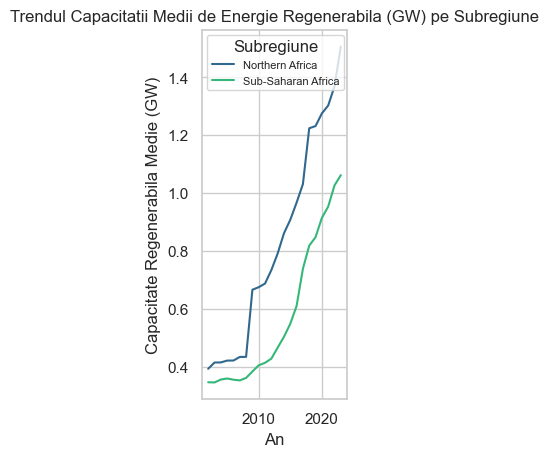

In [99]:
# Plot 1: Capacitatea de Energie Regenerabila
plt.subplot(1, 3, 1)
sns.lineplot(
    data=df_trend,
    x='year',
    y='renewables_capacity',
    hue='subregion_geographic',
    palette='viridis',
    errorbar=None
)
plt.title('Trendul Capacitatii Medii de Energie Regenerabila (GW) pe Subregiune')
plt.xlabel('An')
plt.ylabel('Capacitate Regenerabila Medie (GW)')
plt.legend(title='Subregiune', fontsize=8, loc='upper left')

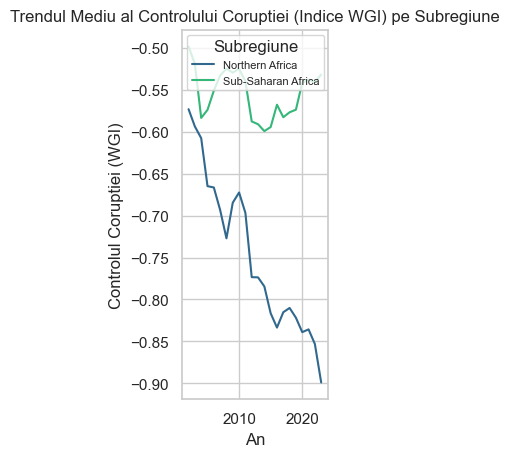

In [100]:
# Plot 2: Controlul Coruptiei
plt.subplot(1, 3, 2)
sns.lineplot(
    data=df_trend,
    x='year',
    y='control_corruption',
    hue='subregion_geographic',
    palette='viridis',
    errorbar=None
)
plt.title('Trendul Mediu al Controlului Coruptiei (Indice WGI) pe Subregiune')
plt.xlabel('An')
plt.ylabel('Controlul Coruptiei (WGI)')
plt.legend(title='Subregiune', fontsize=8, loc='upper left')

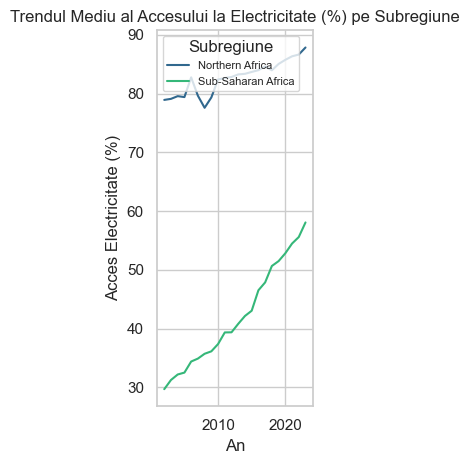

In [101]:
# Plot 3: Accesul la Electricitate
plt.subplot(1, 3, 3)
sns.lineplot(
    data=df_trend,
    x='year',
    y='access_electricity',
    hue='subregion_geographic',
    palette='viridis',
    errorbar=None
)
plt.title('Trendul Mediu al Accesului la Electricitate (%) pe Subregiune')
plt.xlabel('An')
plt.ylabel('Acces Electricitate (%)')
plt.legend(title='Subregiune', fontsize=8, loc='upper left')

plt.tight_layout()
plt.show()

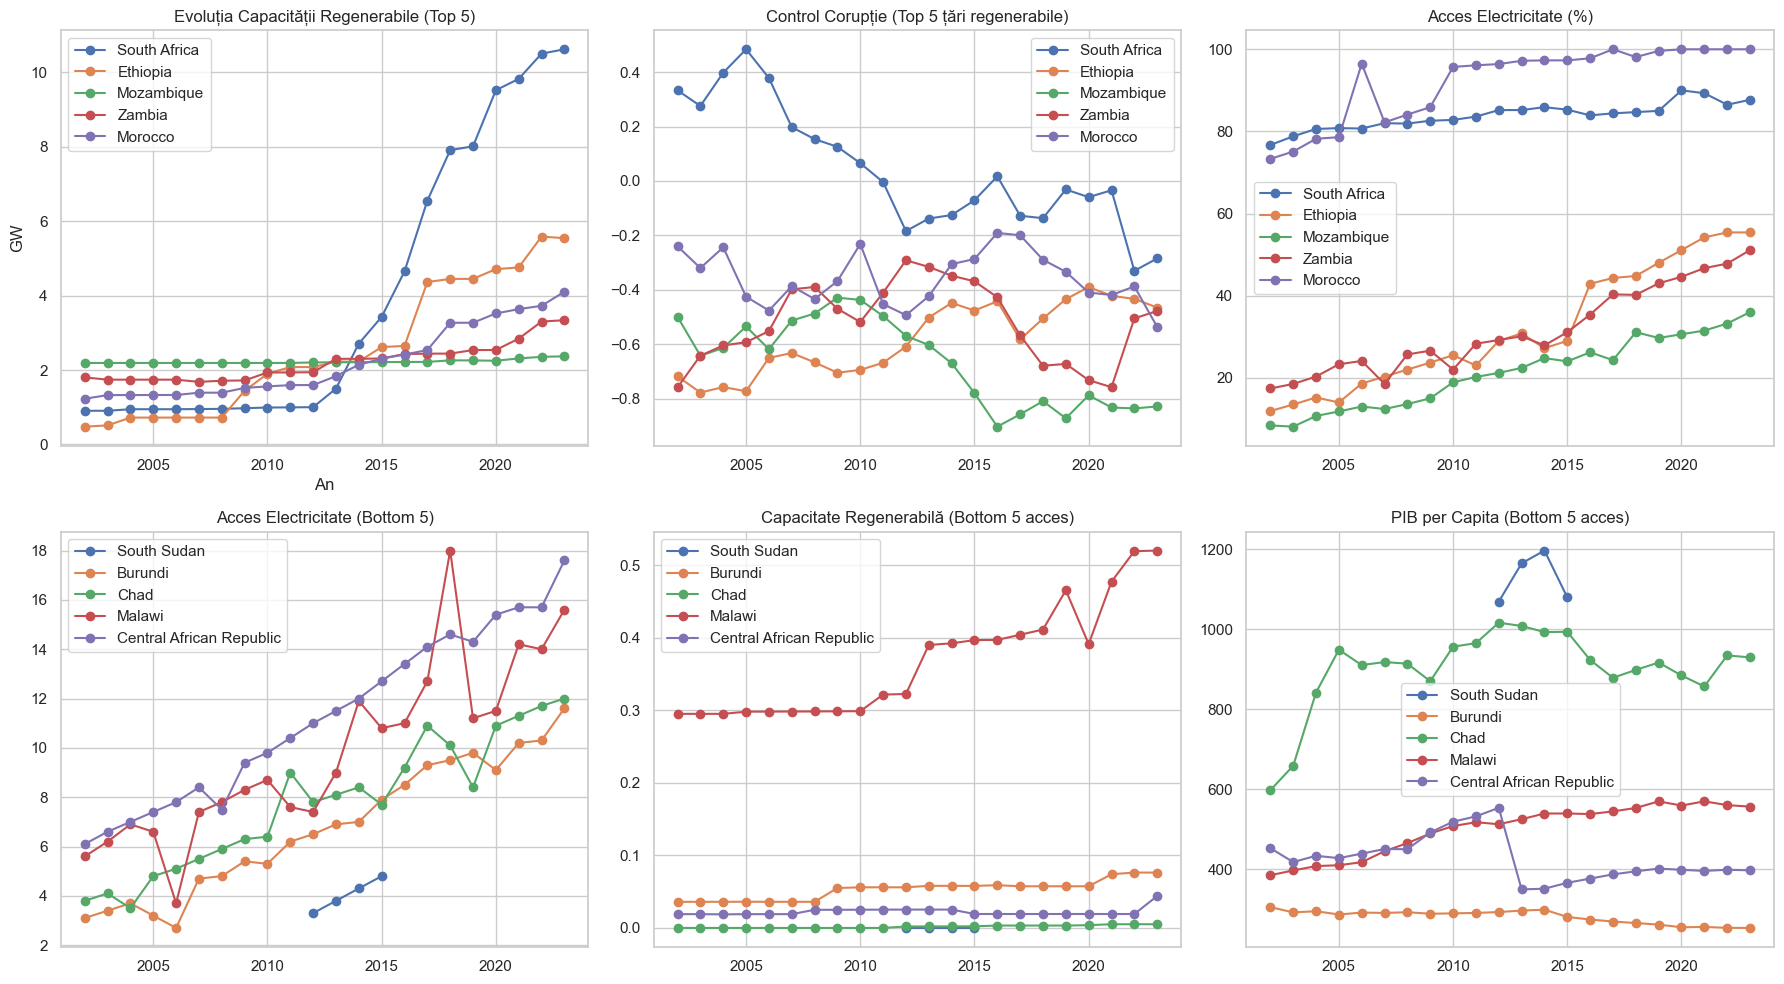

In [102]:
# Top 5 țări cu cea mai mare capacitate regenerabilă
top_countries = df_complet.groupby('country_name')['renewables_capacity'].mean().nlargest(5).index

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Capacitate regenerabilă
for country in top_countries:
    country_data = df_complet[df_complet['country_name'] == country]
    axes[0, 0].plot(country_data['year'], country_data['renewables_capacity'], marker='o', label=country)
axes[0, 0].set_title('Evoluția Capacității Regenerabile (Top 5)')
axes[0, 0].legend()
axes[0, 0].set_xlabel('An')
axes[0, 0].set_ylabel('GW')

# Control corupție
for country in top_countries:
    country_data = df_complet[df_complet['country_name'] == country]
    axes[0, 1].plot(country_data['year'], country_data['control_corruption'], marker='o', label=country)
axes[0, 1].set_title('Control Corupție (Top 5 țări regenerabile)')
axes[0, 1].legend()

# Acces electricitate
for country in top_countries:
    country_data = df_complet[df_complet['country_name'] == country]
    axes[0, 2].plot(country_data['year'], country_data['access_electricity'], marker='o', label=country)
axes[0, 2].set_title('Acces Electricitate (%)')
axes[0, 2].legend()

# Bottom 5 pentru comparație
bottom_countries = df_complet.groupby('country_name')['access_electricity'].mean().nsmallest(5).index

for country in bottom_countries:
    country_data = df_complet[df_complet['country_name'] == country]
    axes[1, 0].plot(country_data['year'], country_data['access_electricity'], marker='o', label=country)
axes[1, 0].set_title('Acces Electricitate (Bottom 5)')
axes[1, 0].legend()

for country in bottom_countries:
    country_data = df_complet[df_complet['country_name'] == country]
    axes[1, 1].plot(country_data['year'], country_data['renewables_capacity'], marker='o', label=country)
axes[1, 1].set_title('Capacitate Regenerabilă (Bottom 5 acces)')
axes[1, 1].legend()

for country in bottom_countries:
    country_data = df_complet[df_complet['country_name'] == country]
    axes[1, 2].plot(country_data['year'], country_data['gdp_per_capita'], marker='o', label=country)
axes[1, 2].set_title('PIB per Capita (Bottom 5 acces)')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

### Matricea de Corelatie

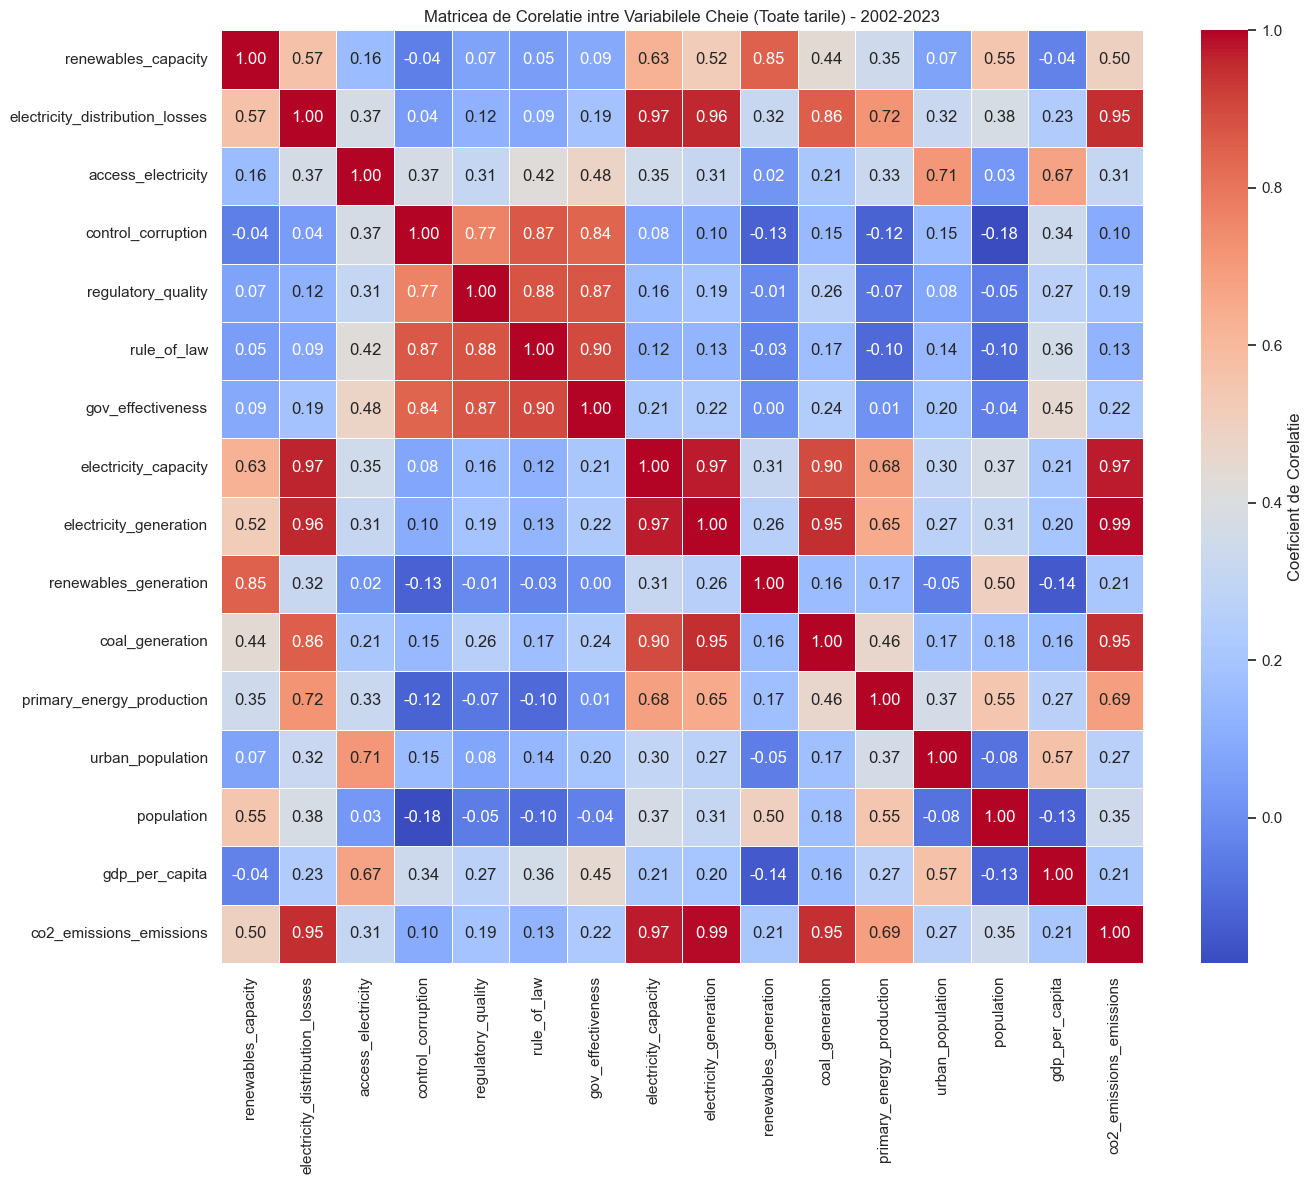


--- Matricea de Corelatie (Valori Numerice) ---
                                 renewables_capacity  electricity_distribution_losses  access_electricity  control_corruption  regulatory_quality  rule_of_law  gov_effectiveness  electricity_capacity  electricity_generation  renewables_generation  coal_generation  primary_energy_production  urban_population  population  gdp_per_capita  co2_emissions_emissions
renewables_capacity                         1.000000                         0.567688            0.159404           -0.044844            0.069192     0.050458           0.090215              0.626073                0.520018               0.848022         0.436112                   0.347459          0.069496    0.550396       -0.035300                 0.498450
electricity_distribution_losses             0.567688                         1.000000            0.373343            0.042615            0.117161     0.085941           0.190143              0.966394                0.960747    

In [103]:
# Selectam doar coloanele numerice (excluzand 'year' si indexul implicit)
numerical_cols = df_complet.select_dtypes(include=np.number).columns.drop('year', errors='ignore')
df_corr = df_complet[numerical_cols]

# Calculam matricea de corelatie
correlation_matrix = df_corr.corr()

# Vizualizam matricea de corelatie sub forma de heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,        # Afiseaza valorile de corelatie
    fmt=".2f",         # Formatul numerelor (2 zecimale)
    cmap='coolwarm',   # Schema de culori
    linewidths=.5,     # Linii intre celule
    cbar_kws={'label': 'Coeficient de Corelatie'}
)
plt.title('Matricea de Corelatie intre Variabilele Cheie (Toate tarile) - 2002-2023')
plt.tight_layout()
plt.show()

# Afisam matricea de corelatie ca tabel
print("\n--- Matricea de Corelatie (Valori Numerice) ---")
print(correlation_matrix.to_string())



### Scatter Plots

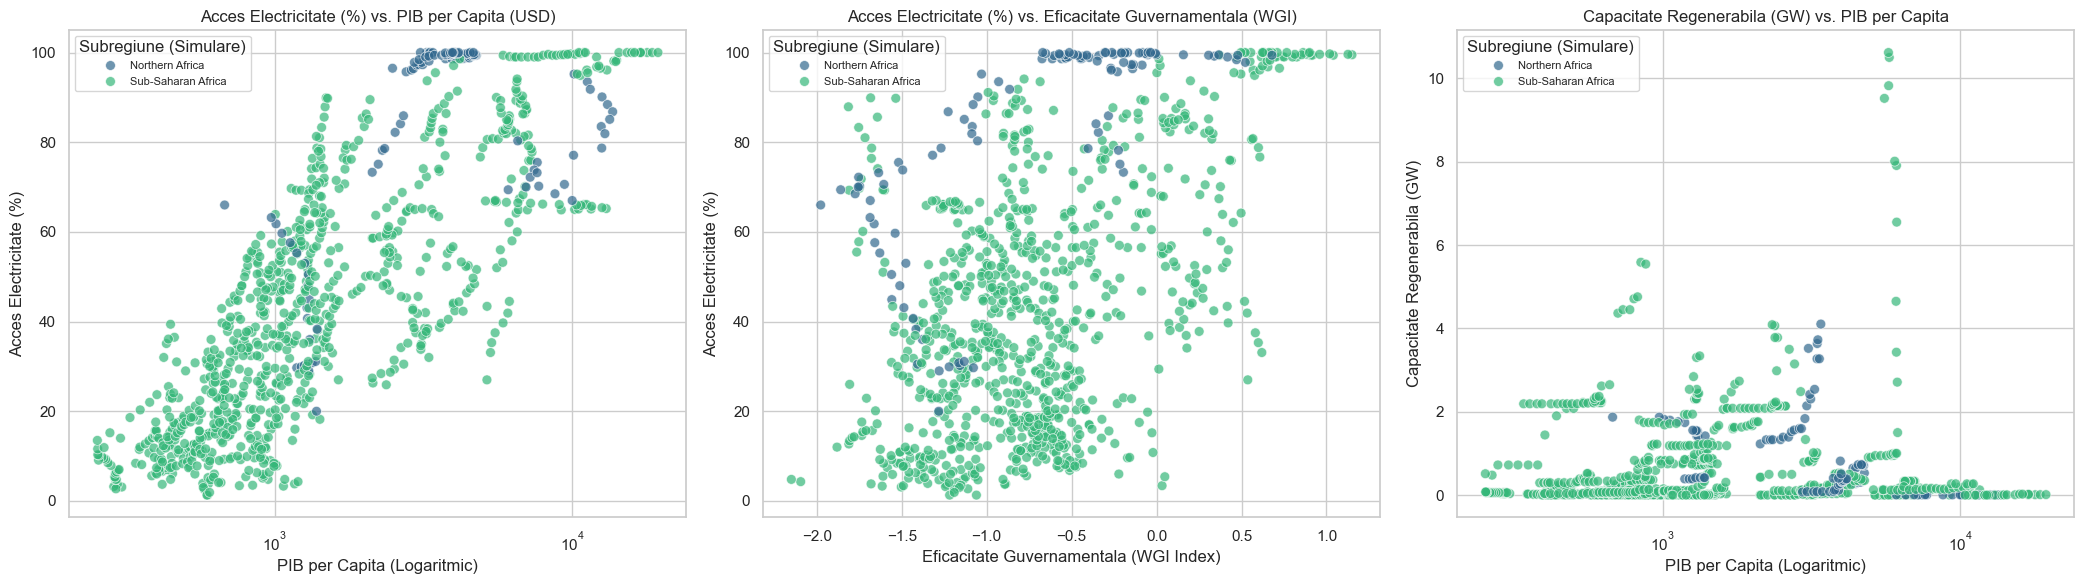

In [104]:
plt.figure(figsize=(21, 6))

# Plot A: Acces Electricitate vs. GDP per Capita (Corelatie: +0.66)
plt.subplot(1, 3, 1)
sns.scatterplot(
    data=df_complet,
    x='gdp_per_capita',
    y='access_electricity',
    hue='subregion_geographic',
    palette='viridis',
    s=50,
    alpha=0.7
)
plt.title('Acces Electricitate (%) vs. PIB per Capita (USD)')
plt.xlabel('PIB per Capita (Logaritmic)')
plt.ylabel('Acces Electricitate (%)')
plt.xscale('log')
plt.legend(title='Subregiune (Simulare)', fontsize=8, loc='upper left')

# Plot B: Acces Electricitate vs. Eficacitate Guvernamentala (Corelatie: +0.44)
plt.subplot(1, 3, 2)
sns.scatterplot(
    data=df_complet,
    x='gov_effectiveness',
    y='access_electricity',
    hue='subregion_geographic',
    palette='viridis',
    s=50,
    alpha=0.7
)
plt.title('Acces Electricitate (%) vs. Eficacitate Guvernamentala (WGI)')
plt.xlabel('Eficacitate Guvernamentala (WGI Index)')
plt.ylabel('Acces Electricitate (%)')
plt.legend(title='Subregiune (Simulare)', fontsize=8, loc='upper left')

# Plot C: Capacitate Regenerabila vs. GDP per Capita (Corelatie: -0.02)
plt.subplot(1, 3, 3)
sns.scatterplot(
    data=df_complet,
    x='gdp_per_capita',
    y='renewables_capacity',
    hue='subregion_geographic',
    palette='viridis',
    s=50,
    alpha=0.7
)
plt.title('Capacitate Regenerabila (GW) vs. PIB per Capita')
plt.xlabel('PIB per Capita (Logaritmic)')
plt.ylabel('Capacitate Regenerabila (GW)')
plt.xscale('log')
plt.legend(title='Subregiune (Simulare)', fontsize=8, loc='upper left')

plt.tight_layout()
plt.show()